# Содержание
[1. Описание проекта](#section_1)

[2. Изучение данных из файла](#section_2)

[3. Предобработка данных](#section_3)

[4. Анализ данных](#section_4)

[5. Проверка гипотез](#section_5)

[6. Общие выводы](#section_6)

## Описание проекта
<a id='section_1'><a/>
    

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

### Описание тарифов
#### Тариф «Смарт»
Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 
1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 
2. сообщение: 3 рубля; 
3. 1 Гб интернет-трафика: 200 рублей.

#### Тариф «Ультра»
Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета: 
1. минута разговора: 1 рубль; 
2. сообщение: 1 рубль; 
3. 1 Гб интернет-трафика: 150 рублей.

## Цель исследования
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла
<a id='section_2'><a/>
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy import stats as st
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
calls = pd.read_csv('calls.csv')
calls.info()
calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [4]:
internet = pd.read_csv('internet.csv')
internet.info()
internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [5]:
messages = pd.read_csv('messages.csv')
messages.info()
messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [6]:
tariffs = pd.read_csv('tariffs.csv')
tariffs.info()
tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
users = pd.read_csv('users.csv')
users.info()
users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


### Вывод

В таблице calls 202 тыс. строк. Пропусков нет. Тип данных в call_date приведем к datetime.

В таблице интернет 150 тыс. строк. Пропуков нет. Дублируются индекса в столбце Unnamed: 0. Session_date приведем к типу datetime.

В таблице сообщения 123 тыс. строк. Пропусков нет. message_date приведем к типу datetime

В таблице тарифы все корректно.

В таблице users всего 500 строк, по кол-ву пользователей. Пропуски есть только в churn_date, подумаем чем можно заполнить. reg_date приведем к типу datetime.

## Предобработка данных
<a id='section_3'><a/>
 

Сначала переведем все даты во всех таблицах в тип datetime

In [8]:
#используем функцию to_datetime из библиотеки пандас
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Столбец duration в calls надо округлить до целых значений. 

Нам надо узнать там даны секунды или минуты. Для этого построим гистограму и посмотрим на расспределение.

<AxesSubplot:>

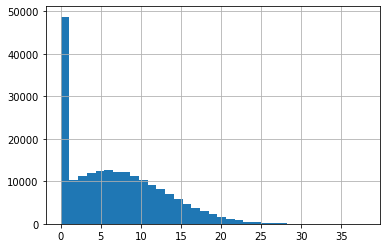

In [9]:
calls['duration'].hist(bins=35)

Пик на 0 связан с тем, что за 0 принимаются звонки, которые никто не принял.

Посмотрим сколько нулей мы имеем.

In [10]:
sum(calls['duration'] == 0)

39613

39 тысяч нулей из 202 тысяч строк.

Вряд ли большнство звонков длятся меньше 20 секунд. Значит данные даны в минутах. Округлим значения до целого в большую сторону.


In [11]:
#используем функцию окргуления из библиотеки numpy и сразу меняем тип данных до целого
calls['duration'] = np.ceil(calls['duration']).astype('int')

Добавим столбец месяц к таблицам сообщений, звонков и интернета для последующей группировки.

In [12]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

Рассмотрим таблицу users подробнее. Посмотрим все уникальные значения из столбцов с названием городов и тарифов.

In [13]:
display(users['city'].sort_values().unique())
display(users['tariff'].unique())

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

array(['ultra', 'smart'], dtype=object)

Группируем таблицу со звонками по id пользователя и месяцу. Функцию применияем суммирования.

In [14]:
#обязательно ресетаем индексы
calls = calls.groupby(['user_id','month']).agg({'duration': 'sum'}).reset_index()
calls

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3169,1498,10,247
3170,1499,9,70
3171,1499,10,449
3172,1499,11,612


In [15]:
internet = internet.groupby(['user_id','month']).agg({'mb_used': 'sum'}).reset_index()
internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3203 non-null   int64  
 1   month    3203 non-null   int64  
 2   mb_used  3203 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


Данные по использованию трафика необходимо перевести в гигабайты. Для этого поделим все значения на 1024.

После округлим в бОльшую сторону, заменим тип данных на целый и переименуем столбец в gb_used.

In [16]:
internet['mb_used'] = internet['mb_used'] / 1024
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')

In [17]:
internet = internet.rename(columns={'mb_used':'gb_used'})

Группируем таблицу с СМС, как и остальные таблицы. Применяем функцию счета, а не суммирования.

Переименовываем столбец.

In [18]:
messages = messages.groupby(['user_id','month']).agg({'id': 'count'}).reset_index()
messages = messages.rename(columns={'id':'sms_month_count'})
messages

,user_id,month,sms_month_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Типы изменили, пропуски заполнили, правильное написание составили. Осталось объеденить таблицы в одну.

In [19]:
data = calls.merge(internet, on = ['user_id', 'month'], how = 'outer')
data = data.merge(messages, on = ['user_id', 'month'], how = 'outer')

In [20]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          3214 non-null   int64  
 1   month            3214 non-null   int64  
 2   duration         3174 non-null   float64
 3   gb_used          3203 non-null   float64
 4   sms_month_count  2717 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 150.7 KB


,user_id,month,duration,gb_used,sms_month_count
0,1000,5,159.0,3.0,22.0
1,1000,6,172.0,23.0,60.0
2,1000,7,340.0,14.0,75.0
3,1000,8,408.0,14.0,81.0
4,1000,9,466.0,15.0,57.0
...,...,...,...,...,...
3209,1489,8,NaN,11.0,17.0
3210,1489,9,NaN,17.0,32.0
3211,1489,10,NaN,20.0,21.0
3212,1489,11,NaN,18.0,20.0


К таблице с звонками, трафиком и смс добавим таблицу с данными пользователей и данные по тарифам.

In [21]:
data = data.merge(users, on = ['user_id'], how = 'outer')

In [22]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
data = data.merge(tariffs, on = ['tariff'], how = 'outer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3214 non-null   float64       
 2   duration               3174 non-null   float64       
 3   gb_used                3203 non-null   float64       
 4   sms_month_count        2717 non-null   float64       
 5   age                    3216 non-null   int64         
 6   churn_date             189 non-null    datetime64[ns]
 7   city                   3216 non-null   object        
 8   first_name             3216 non-null   object        
 9   last_name              3216 non-null   object        
 10  reg_date               3216 non-null   datetime64[ns]
 11  tariff                 3216 non-null   object        
 12  messages_included      3216 non-null   int64         
 13  mb_

In [23]:
data = data.rename(columns={'mb_per_month_included':'gb_per_month_included'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3214 non-null   float64       
 2   duration               3174 non-null   float64       
 3   gb_used                3203 non-null   float64       
 4   sms_month_count        2717 non-null   float64       
 5   age                    3216 non-null   int64         
 6   churn_date             189 non-null    datetime64[ns]
 7   city                   3216 non-null   object        
 8   first_name             3216 non-null   object        
 9   last_name              3216 non-null   object        
 10  reg_date               3216 non-null   datetime64[ns]
 11  tariff                 3216 non-null   object        
 12  messages_included      3216 non-null   int64         
 13  gb_

Столбец mb_per_month_included переведем в гигайбайты и переименуем.

In [24]:
for i in range(len(data)):
    if data['gb_per_month_included'][i] == 30720:
        data['gb_per_month_included'][i] = 30
    else:
        data['gb_per_month_included'][i] = 15
data

,user_id,month,duration,gb_used,sms_month_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,3.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
1,1000,6.0,172.0,23.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
2,1000,7.0,340.0,14.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
3,1000,8.0,408.0,14.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
4,1000,9.0,466.0,15.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,17.0,32.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3
3212,1489,10.0,NaN,20.0,21.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3
3213,1489,11.0,NaN,18.0,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3
3214,1489,12.0,NaN,17.0,35.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3


Заполним пропуски нулями, т.к. в некотрые месяцы использование могло и не быть.

Или удалим их?

In [25]:
data = data.fillna(0)

Добавим столбцы с перерасходом услуг.

In [26]:
data['minute_over'] = data['duration'] - data['minutes_included']
data['gb_over'] = data['gb_used'] - data['gb_per_month_included']
data['sms_over'] = data['sms_month_count'] - data['messages_included']
data

,user_id,month,duration,gb_used,sms_month_count,age,churn_date,city,first_name,last_name,...,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_over,gb_over,sms_over
0,1000,5.0,159.0,3.0,22.0,52,0,Краснодар,Рафаил,Верещагин,...,1000,30,3000,1950,150,1,1,-2841.0,-27.0,-978.0
1,1000,6.0,172.0,23.0,60.0,52,0,Краснодар,Рафаил,Верещагин,...,1000,30,3000,1950,150,1,1,-2828.0,-7.0,-940.0
2,1000,7.0,340.0,14.0,75.0,52,0,Краснодар,Рафаил,Верещагин,...,1000,30,3000,1950,150,1,1,-2660.0,-16.0,-925.0
3,1000,8.0,408.0,14.0,81.0,52,0,Краснодар,Рафаил,Верещагин,...,1000,30,3000,1950,150,1,1,-2592.0,-16.0,-919.0
4,1000,9.0,466.0,15.0,57.0,52,0,Краснодар,Рафаил,Верещагин,...,1000,30,3000,1950,150,1,1,-2534.0,-15.0,-943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,0.0,17.0,32.0,35,0,Санкт-Петербург,Павел,Гончаров,...,50,15,500,550,200,3,3,-500.0,2.0,-18.0
3212,1489,10.0,0.0,20.0,21.0,35,0,Санкт-Петербург,Павел,Гончаров,...,50,15,500,550,200,3,3,-500.0,5.0,-29.0
3213,1489,11.0,0.0,18.0,20.0,35,0,Санкт-Петербург,Павел,Гончаров,...,50,15,500,550,200,3,3,-500.0,3.0,-30.0
3214,1489,12.0,0.0,17.0,35.0,35,0,Санкт-Петербург,Павел,Гончаров,...,50,15,500,550,200,3,3,-500.0,2.0,-15.0


Мы видим отрицательные значения в столбцах с перерасходом, значит пользователи не израсходовали все услуги. Надо привести все отрицательные значения к нулю, а положительные оставить также.

Избавимся от отрацательных значений с помощью модуля, сложения и деления. потому что решения я нагуглить не смог.

Все значения мы складываем с этими же значениями по модулю. Отрицательные становятся нулями, положительный удвоились. Далее, делим все значение на два. Нули остались нулями. Положительные удвоенные значения вернулись в исходным.

In [27]:
data['minute_over'] = (data['minute_over'] + abs(data['minute_over']))/2
data['gb_over'] = (data['gb_over'] + abs(data['gb_over']))/2
data['sms_over'] = (data['sms_over'] + abs(data['sms_over']))/2
data

,user_id,month,duration,gb_used,sms_month_count,age,churn_date,city,first_name,last_name,...,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_over,gb_over,sms_over
0,1000,5.0,159.0,3.0,22.0,52,0,Краснодар,Рафаил,Верещагин,...,1000,30,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,6.0,172.0,23.0,60.0,52,0,Краснодар,Рафаил,Верещагин,...,1000,30,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,7.0,340.0,14.0,75.0,52,0,Краснодар,Рафаил,Верещагин,...,1000,30,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,8.0,408.0,14.0,81.0,52,0,Краснодар,Рафаил,Верещагин,...,1000,30,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,9.0,466.0,15.0,57.0,52,0,Краснодар,Рафаил,Верещагин,...,1000,30,3000,1950,150,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,0.0,17.0,32.0,35,0,Санкт-Петербург,Павел,Гончаров,...,50,15,500,550,200,3,3,0.0,2.0,0.0
3212,1489,10.0,0.0,20.0,21.0,35,0,Санкт-Петербург,Павел,Гончаров,...,50,15,500,550,200,3,3,0.0,5.0,0.0
3213,1489,11.0,0.0,18.0,20.0,35,0,Санкт-Петербург,Павел,Гончаров,...,50,15,500,550,200,3,3,0.0,3.0,0.0
3214,1489,12.0,0.0,17.0,35.0,35,0,Санкт-Петербург,Павел,Гончаров,...,50,15,500,550,200,3,3,0.0,2.0,0.0


Рассчитываем помесячную выручку, как стоимость тарифа в месяц плюс перерасход услуг в объеме на стоимость единицы объема.

In [28]:
data['monthly_revenue'] = (
    (data['minute_over'] * data['rub_per_minute']) + 
    (data['gb_over'] * data['rub_per_gb']) +
    (data['sms_over'] * data['rub_per_message']) +
    data['rub_monthly_fee']
)
data

,user_id,month,duration,gb_used,sms_month_count,age,churn_date,city,first_name,last_name,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minute_over,gb_over,sms_over,monthly_revenue
0,1000,5.0,159.0,3.0,22.0,52,0,Краснодар,Рафаил,Верещагин,...,30,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6.0,172.0,23.0,60.0,52,0,Краснодар,Рафаил,Верещагин,...,30,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7.0,340.0,14.0,75.0,52,0,Краснодар,Рафаил,Верещагин,...,30,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8.0,408.0,14.0,81.0,52,0,Краснодар,Рафаил,Верещагин,...,30,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9.0,466.0,15.0,57.0,52,0,Краснодар,Рафаил,Верещагин,...,30,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,0.0,17.0,32.0,35,0,Санкт-Петербург,Павел,Гончаров,...,15,500,550,200,3,3,0.0,2.0,0.0,950.0
3212,1489,10.0,0.0,20.0,21.0,35,0,Санкт-Петербург,Павел,Гончаров,...,15,500,550,200,3,3,0.0,5.0,0.0,1550.0
3213,1489,11.0,0.0,18.0,20.0,35,0,Санкт-Петербург,Павел,Гончаров,...,15,500,550,200,3,3,0.0,3.0,0.0,1150.0
3214,1489,12.0,0.0,17.0,35.0,35,0,Санкт-Петербург,Павел,Гончаров,...,15,500,550,200,3,3,0.0,2.0,0.0,950.0


### Вывод

Мы сделали таблицу со всеми данными о пользователях. Убрали пропуски, поменяли типы данных, сгруппировали данные по месяцам и пользователям и рассчитали помесячную выручку.

Можем приступать к анализу

## Анализ данных
<a id='section_4'><a/>
 

Разделим данные на две таблицы по тарифам смарт и ультра.

In [29]:
smart=(data.query('tariff == "smart"'))
ultra=(data.query('tariff == "ultra"'))

Получим данные по параметрам 'duration','gb_used','sms_month_count','monthly_revenue' через метод describe.

In [30]:
display(ultra[['duration','gb_used','sms_month_count','monthly_revenue']].describe().T.style.format('{:.0f}'))
display(smart[['duration','gb_used','sms_month_count','monthly_revenue']].describe().T.style.format('{:.0f}'))

,count,mean,std,min,25%,50%,75%,max
duration,986,526,318,0,282,518,752,1673
gb_used,986,19,10,0,12,19,27,49
sms_month_count,986,49,48,0,6,38,79,224
monthly_revenue,986,2070,376,1950,1950,1950,1950,4800


,count,mean,std,min,25%,50%,75%,max
duration,2230,418,190,0,282,422,545,1435
gb_used,2230,16,6,0,13,17,20,38
sms_month_count,2230,33,28,0,10,28,51,143
monthly_revenue,2230,1290,818,550,550,1021,1750,6770


Построим график помесячной выручки по двум тарифам.

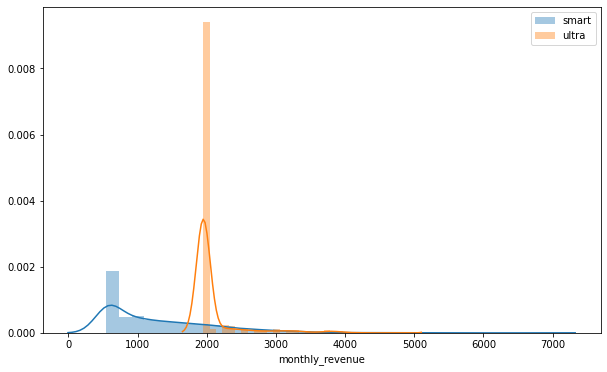

In [31]:
plt.figure(figsize=(10, 6))
sns.distplot(smart['monthly_revenue'],label = smart['tariff'])
sns.distplot(ultra['monthly_revenue'],label = ultra['tariff'])
plt.legend()
plt.show()

Видим пики на значениях стоимости тарифов. В тарифе смарт больше людей, которые переплачивают за свой тариф. Связяно с тем, что там меньше пакеты услуг и за них выйти легче.

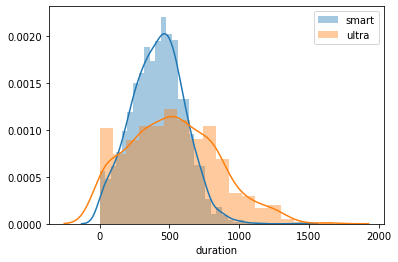

In [32]:
sns.distplot(smart['duration'],label = smart['tariff'])
sns.distplot(ultra['duration'],label = ultra['tariff'])
plt.legend()
plt.show()

Длительность звонков на смарте ниже и пик четче. Почти половина всех пользователей смарта выходят за рамки своего тарифа. Пользователи ультры еле доходят половины своего тарифа.

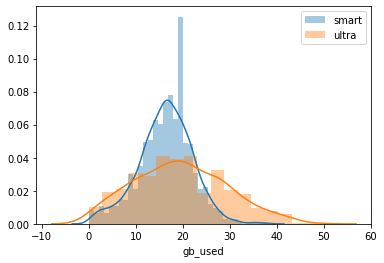

In [33]:
sns.distplot(smart['gb_used'],label = smart['tariff'])
sns.distplot(ultra['gb_used'],label = ultra['tariff'])
plt.legend()
plt.show()

По данным использования интернета графики визуально похожи. Также половина всех пользователей смарта выходят за рамки своего тарифа. Но тут и пользователи ультры также любят смотреть мемы в интернете.

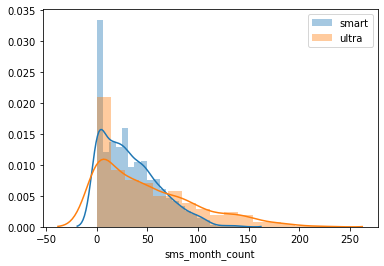

In [34]:
sns.distplot(smart['sms_month_count'],label = smart['tariff'])
sns.distplot(ultra['sms_month_count'],label = ultra['tariff'])
plt.legend()
plt.show()

В использовании смс пользователи очень похожи по графикам. Смарт переходит за свои ограничения по услугам. Ультра даже до половины не доходит.

Посмотрим на дисперсию и среднее по четырем параметрам.

In [35]:
print('Дисперсия пользоватлей тарифа "Смарт" по четырем параметрам')
np.var(smart[['duration','gb_used','sms_month_count','monthly_revenue']])

Дисперсия пользоватлей тарифа "Смарт" по четырем параметрам


duration            36265.124153
gb_used                33.118595
sms_month_count       796.597877
monthly_revenue    669430.436198
dtype: float64

In [36]:
print('Дисперсия пользоватлей тарифа "Ультра" по четырем параметрам')
np.var(ultra[['duration','gb_used','sms_month_count','monthly_revenue']])

Дисперсия пользоватлей тарифа "Ультра" по четырем параметрам


duration           100950.006233
gb_used                97.279783
sms_month_count      2283.099557
monthly_revenue    141244.319561
dtype: float64

In [37]:
print('Стандартное отклонение пользоватлей тарифа "Смарт" по четырем параметрам')
np.std(smart[['duration','gb_used','sms_month_count','monthly_revenue']])

Стандартное отклонение пользоватлей тарифа "Смарт" по четырем параметрам


duration           190.434041
gb_used              5.754876
sms_month_count     28.224066
monthly_revenue    818.187287
dtype: float64

In [38]:
print('Стандартное отклонение пользоватлей тарифа "Ультра" по четырем параметрам')
np.std(ultra[['duration','gb_used','sms_month_count','monthly_revenue']])

Стандартное отклонение пользоватлей тарифа "Ультра" по четырем параметрам


duration           317.726307
gb_used              9.863051
sms_month_count     47.781791
monthly_revenue    375.824852
dtype: float64

In [39]:
print('Пользователи тарифа Смарт используют в среднем', round(smart['sms_month_count'].mean()), 'сообщений в месяц')
print('Пользователи тарифа Смарт используют в среднем', round(smart['gb_used'].mean()), 'гигабайт в месяц')
print('Пользователи тарифа Смарт используют в среднем', round(smart['duration'].mean()), 'минут в месяц')
print('Пользователи тарифа Смарт тратят в среднем', round(smart['monthly_revenue'].mean()), 'рублей в месяц')
print()
print('Пользователи тарифа Ультра используют в среднем', round(ultra['sms_month_count'].mean()), 'сообщений в месяц')
print('Пользователи тарифа Ультра используют в среднем', round(ultra['gb_used'].mean()), 'гигабайт в месяц')
print('Пользователи тарифа Ультра используют в среднем', round(ultra['duration'].mean()), 'минут в месяц')
print('Пользователи тарифа Ультра тратят в среднем', round(ultra['monthly_revenue'].mean()), 'рублей в месяц')


Пользователи тарифа Смарт используют в среднем 33 сообщений в месяц
Пользователи тарифа Смарт используют в среднем 16 гигабайт в месяц
Пользователи тарифа Смарт используют в среднем 418 минут в месяц
Пользователи тарифа Смарт тратят в среднем 1290 рублей в месяц

Пользователи тарифа Ультра используют в среднем 49 сообщений в месяц
Пользователи тарифа Ультра используют в среднем 19 гигабайт в месяц
Пользователи тарифа Ультра используют в среднем 526 минут в месяц
Пользователи тарифа Ультра тратят в среднем 2070 рублей в месяц


Хочу еще посмотреть скольким людям стоит перейти на тариф ультра с тарифа смарт. Для этого я сгруппирую их только по id пользователей и выведу среднее значение для каждого.

In [40]:
smart_grouped = smart.groupby(['user_id']).agg({'monthly_revenue': 'mean'}).reset_index()
smart_grouped.info()
sum(smart_grouped['monthly_revenue'] > 1950)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          351 non-null    int64  
 1   monthly_revenue  351 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.6 KB


49

### Вывод

В среднем пользователи на тарифе ультра потребляют больше опций, но не сильно больше. И так же платят больше, что очевидно, сам тариф обходится дороже.

Получили дисперсию по 4 параметрам. Дисперсия потвердила наши гистограммы. Вы видим, что на гистограмме с использованием смс, пользователи тарифа Ультра более "размазаны" по графику, чем пользователи тарифа Смарт. Дисперсия это потвреждает, 2283 и 796, соотвественно. На оставшихся параметрах, кроме monthly_revenue, соотношение аналогичны. На monthly_revenue, они полностью противоположны и у пользователей тарифа Смарт, данные более размазаны и диспресия соответвенно выше.

Пользователи тарифа Смарт используют в среднем 33 сообщений в месяц при дисперсии 36265 и стандартном отклонением 190.
<br>Пользователи тарифа Смарт используют в среднем 16 гигабайт в месяц при дисперсии 33 и стандартном отклонением 5,7.
<br>Пользователи тарифа Смарт используют в среднем 418 минут в месяц при дисперсии 796 и стандартном отклонением 28.
<br>Пользователи тарифа Смарт тратят в среднем 1290 рублей в месяц при дисперсии 669430 и стандартном отклонением 818.

Пользователи тарифа Ультра используют в среднем 49 сообщений в месяц при дисперсии 100950 и стандартном отклонением 317.
<br>Пользователи тарифа Ультра используют в среднем 19 гигабайт в месяц при дисперсии 97 и стандартном отклонением 9.
<br>Пользователи тарифа Ультра используют в среднем 526 минут в месяц при дисперсии 2283 и стандартном отклонением 47.
<br>Пользователи тарифа Ультра тратят в среднем 2070 рублей в месяц при дисперсии 141224 и стандартном отклонением 375.

Пользователи смарта чаще переплачивают из-за того, то в их тарифе меньше пакет услуг. Когда услуг они используют не сильно меньше чем пользователи ультры. Но переходить на ультру им не стоит, т.к. там сам пакет стоит больше чем тратят в среднем на смарте. 
<br> Таких, кому стоит перейти на ультру всего 49 человек из 351.

## Проверка гипотез
<a id='section_5'><a/>
 

Проверим гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Нулевая гипотеза будет: выручка пользователей равна. Альтернативная гипотеза: выручка отличается

In [41]:
smart = smart['monthly_revenue']
ultra = ultra['monthly_revenue']

alpha = 0.01

results = st.ttest_ind(smart, ultra)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.081909555489931e-161
Отвергаем нулевую гипотезу


Выручка отличается, ура! Гипотезу отвергаем

Проверим гипотезу, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Нулевая гипотеза будет: выручка пользователей равна. Альтернативная гипотеза: выручка отличается

In [42]:
moscow = (data.query('city == "Москва"'))
nonmoscow = (data.query('city != "Москва"'))

moscow = moscow['monthly_revenue']
nonmoscow = nonmoscow['monthly_revenue']

results = st.ttest_ind(moscow, nonmoscow)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


Выручка одинакова и гипотеза подтвердилась

## Общие выводы
<a id='section_6'><a/>
 

Мы получили архивы с данными. Обработали их, заменили типы данных. Объеденили таблицы в одну. Добавили необходимые для анализа столбцы. Сгруппировали данные по месяцам и пользователям, рассчитали помесячную выручку и заполнили пропуски.

Разделили данные на две таблицы по тарифам. Построили гистаграммы по длительности звонков, трафику интернета, отправленных смс и потраченное сумме в месяц. По тем же параметрам получили дисперсию, отклонение и среднее значение.

По дисперсии мы видим, что у пользователей ультры хвост будет длинее на парамтерах: длительность звонков, использованных смс, интернет трафика. Они пользуются услугами более активнее. Противоположная ситуация с параметром месячной выручкой. И эти данные подтверждают наши гистограммы и среднее.

Вывели две гипотезы, что выручка на обоих тарифах равна и выручка равна в Москве и остальной стране. Первую гипотезу мы отвергли. Вторую подтвердили.